In [73]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [74]:
df = pd.read_csv('UK_international-visits.csv')
print(df.shape)
df.head()

(549853, 11)


/var/folders/d3/ry6v0r7j28d4wdqwrz_hvdqc0000gn/T/ipykernel_55403/1959004591.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UK_international-visits.csv')


,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,4.431616,1.013484,9.530416,6
1,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
2,2002,January-March,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,0.859430,0.044346,2.575960,1
3,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTHERN ENGLAND,0.859430,0.044346,2.575960,1
4,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTH EAST,0.859430,0.044346,2.575960,1


In [75]:
df['area'].unique()
#convert to array of strings
regions = df['area'].astype(str).unique()
print(regions)


['TOTAL ENGLAND' 'LONDON' 'REST OF ENGLAND' 'SOUTHERN ENGLAND'
 'SOUTH EAST' 'SCOTLAND' 'ALL STAYING VISITS' "ENGLAND'S NORTH COUNTRY"
 'CENTRAL ENGLAND' 'NORTH EAST' 'NORTH WEST' 'WEST MIDLANDS'
 'EAST MIDLANDS' 'EAST OF ENGLAND' 'SOUTH WEST' 'YORKSHIRE' 'WALES'
 ' NORTHERN IRELAND' ' OIL RIGS/TRAVELLING' ' ISLE OF MAN'
 ' CHANNEL ISLANDS']


In [76]:
regions = ['North', 'Midlands', 'East', 'South', 'London']
london = ['LONDON']
south = ['SOUTH WEST', 'SOUTH EAST', 'SOUTHERN ENGLAND', ' CHANNEL ISLANDS',  ' ISLE OF MAN']
east = ['EAST OF ENGLAND', 'REST OF ENGLAND']
midlands = ['WEST MIDLANDS', 'EAST MIDLANDS', 'CENTRAL ENGLAND', 'YORKSHIRE']
north = ['NORTH EAST', 'NORTH WEST', ' NORTHERN IRELAND', 'SCOTLAND', 'WALES', "ENGLAND'S NORTH COUNTRY"]
#map regions to areas
df['area'] = df['area'].replace(london, 'London')
df['area'] = df['area'].replace(south, 'South')
df['area'] = df['area'].replace(east, 'East')
df['area'] = df['area'].replace(midlands, 'Midlands')
df['area'] = df['area'].replace(north, 'North')

df['area'].unique()
#drop 'ALL STAYING VISITS' and 'OIL RIGS/TRAVELLING' and 'TOTAL ENGLAND'
df = df[df.area != 'ALL STAYING VISITS']
df = df[df.area != ' OIL RIGS/TRAVELLING']
df = df[df.area != 'TOTAL ENGLAND']
df['area'].unique()

array(['London', 'East', 'South', 'North', 'Midlands'], dtype=object)

In [77]:
df.shape

(398054, 11)

In [78]:
# combine the yeae and quarter columns
quarters = df['quarter'].unique().astype(str)
#map quarters to numbers [0,0.25,0.5,0.75]
mapping = {quarters[0]:0, quarters[1]:0.25, quarters[2]:0.5, quarters[3]:0.75}
df['quarter'] = df['quarter'].replace(mapping)

In [79]:
df['quarter'].unique()

array([0.  , 0.25, 0.5 , 0.75])

In [80]:
#combine year and quarter columns by adding them together, casting them as floats
#map '2019P' to 2019
df['year'] = df['year'].replace('2019P', 2019)
df['year'] = df['year'].astype(float)
df['quarter'] = df['quarter'].astype(float)
df['time'] = df['year'] + df['quarter']

In [81]:
df['time'].unique()

array([2002.  , 2002.25, 2002.5 , 2002.75, 2003.  , 2003.25, 2003.5 ,
       2003.75, 2004.  , 2004.25, 2004.5 , 2004.75, 2005.  , 2005.25,
       2005.5 , 2005.75, 2006.  , 2006.25, 2006.5 , 2006.75, 2007.  ,
       2007.25, 2007.5 , 2007.75, 2008.  , 2008.25, 2008.5 , 2008.75,
       2009.  , 2009.25, 2009.5 , 2009.75, 2010.  , 2010.25, 2010.5 ,
       2010.75, 2011.  , 2011.25, 2011.5 , 2011.75, 2012.  , 2012.25,
       2012.5 , 2012.75, 2013.  , 2013.25, 2013.5 , 2013.75, 2014.  ,
       2014.25, 2014.5 , 2014.75, 2015.  , 2015.25, 2015.5 , 2015.75,
       2016.  , 2016.25, 2016.5 , 2016.75, 2017.  , 2017.25, 2017.5 ,
       2017.75, 2018.  , 2018.25, 2018.5 , 2018.75, 2019.  , 2019.25,
       2019.5 ])

In [82]:
#filter to only tourist visits
df['purpose'].unique()
df = df[df.purpose == 'Holiday']


In [83]:
#drop quarter and mode
df = df.drop(['year','quarter', 'mode', 'purpose'], axis=1)


In [84]:

EU = df['market'].unique()[:24]
EU2 = df['market'].unique()[54:57]
Americas = df['market'].unique()[24:30]
Asia = df['market'].unique()[30:49]
Asia2 = df['market'].unique()[58:62]
Africa = df['market'].unique()[49:54]

df['market'].unique()
#concat EU and EU2
EU = np.concatenate((EU, EU2), axis=None)
#concat Asia and Asia2
Asia = np.concatenate((Asia, Asia2), axis=None)
#add chile to Americas
Americas = np.append(Americas, 'Chile')
print(EU, Americas, Asia, Africa)

['Belgium' 'Luxembourg' 'France' 'Germany' 'Italy' 'Netherlands' 'Denmark'
 'Greece' 'Spain' 'Portugal' 'Austria' 'Sweden' 'Finland' 'Irish Republic'
 'Turkey' 'Switzerland' 'Norway' 'Iceland' 'Czech Republic' 'Poland'
 'Hungary' 'Russia' 'Other Western Europe' 'Other Eastern Europe'
 'Bulgaria' 'Romania' 'Serbia'] ['USA' 'Canada' 'Mexico' 'Brazil' 'Argentina'
 'Other Central & South America' 'Chile'] ['Hong Kong' 'Malaysia' 'Thailand' 'Singapore' 'Taiwan' 'China'
 'Other Asia' 'Japan' 'South Korea' 'Australia' 'New Zealand'
 'United Arab Emirates' 'Saudi Arabia' 'Kuwait' 'Other Middle East'
 'Egypt' 'Israel' 'India' 'Pakistan' 'Indonesia' 'Bahrain' 'Oman' 'Qatar'] ['South Africa' 'Other Southern Africa' 'Nigeria' 'Kenya' 'Other Africa']


In [85]:
#make markets mappping
mapping = {}
for i in EU:
    mapping[i] = 'EU'
for i in Americas:
    mapping[i] = 'Americas'
for i in Asia:
    mapping[i] = 'Asia'
for i in Africa:
    mapping[i] = 'Africa'

df['market'] = df['market'].replace(mapping)
df['market'].unique()

array(['EU', 'Americas', 'Asia', 'Africa'], dtype=object)

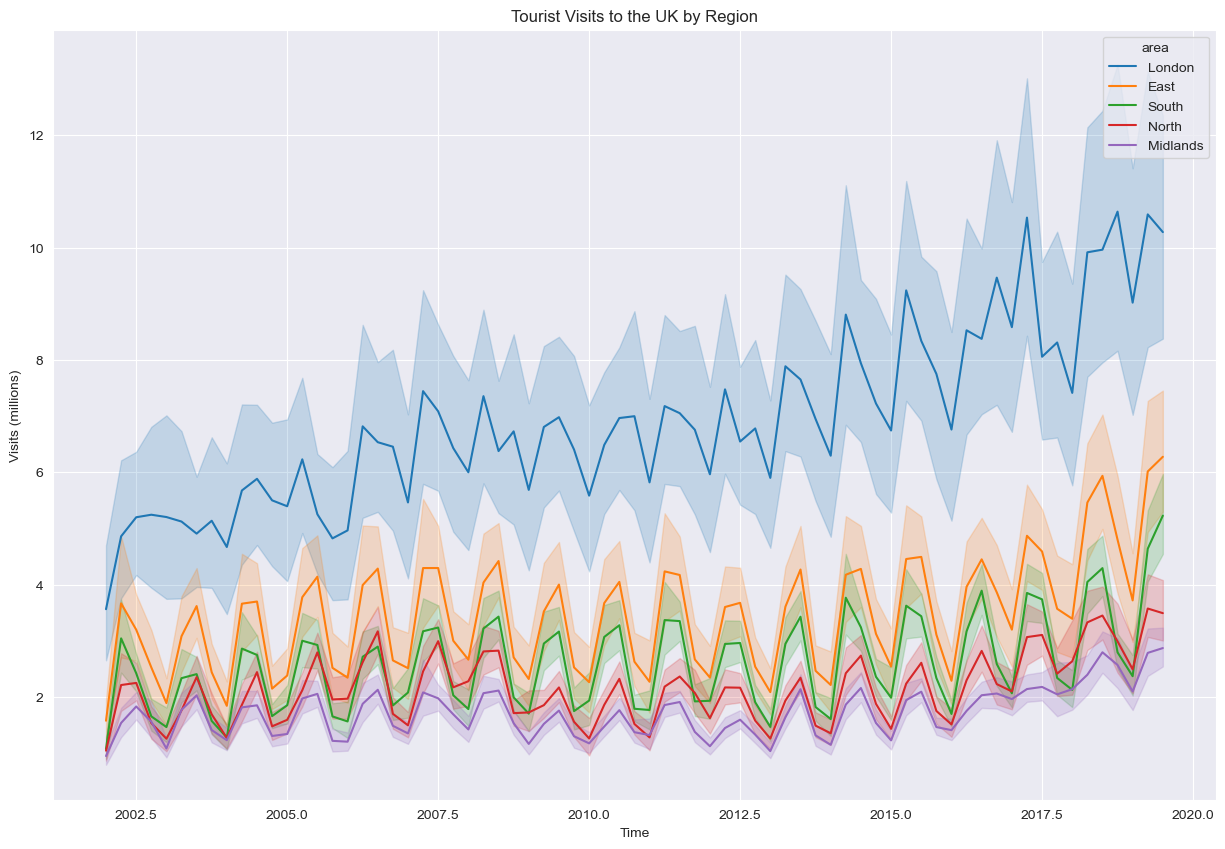

In [86]:
# plot tourist visits over time
plt.figure(figsize=(15,10))
sns.lineplot(x='time', y='visits', hue='area', data=df)
plt.title('Tourist Visits to the UK by Region')
plt.xlabel('Time')
plt.ylabel('Visits (millions)')
plt.show()

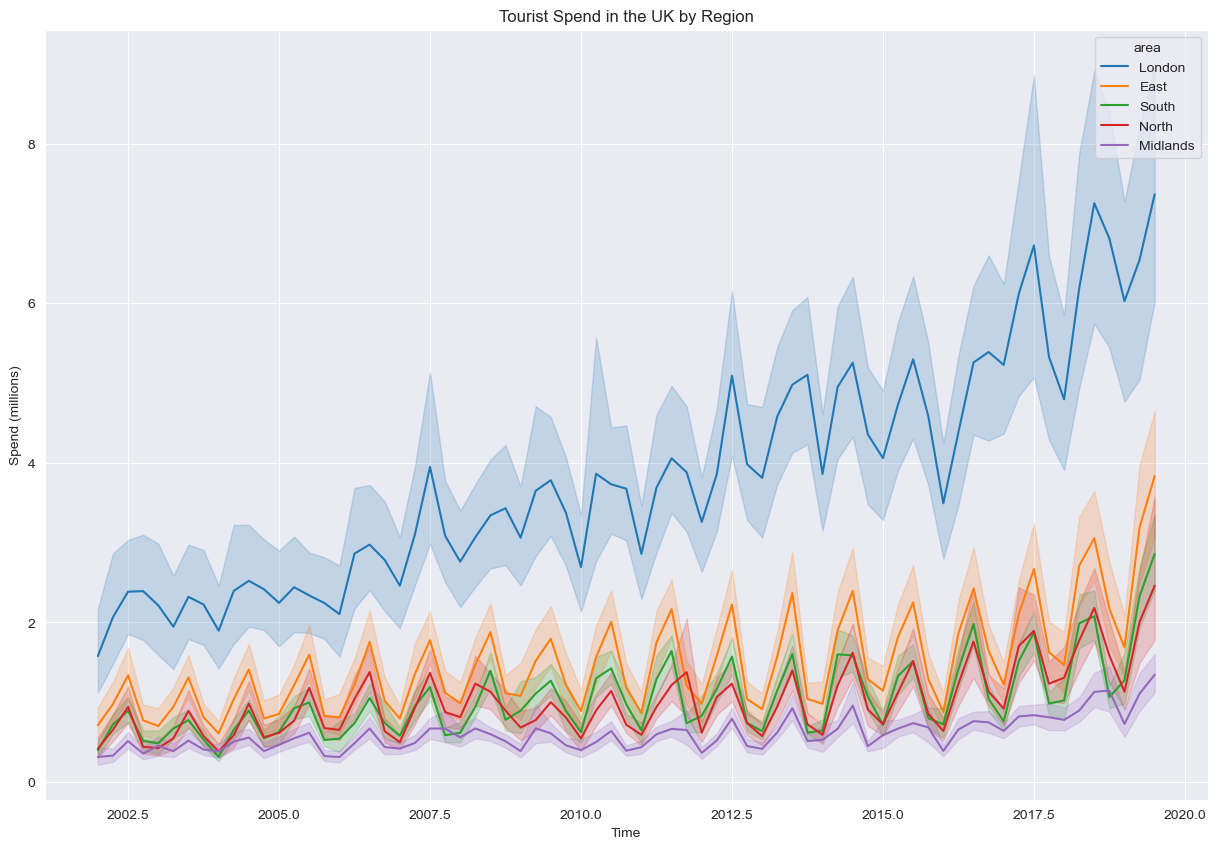

In [87]:
# plot tourist spend over time
plt.figure(figsize=(15,10))
sns.lineplot(x='time', y='spend', hue='area', data=df)
plt.title('Tourist Spend in the UK by Region')
plt.xlabel('Time')
plt.ylabel('Spend (millions)')
plt.show()